In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dask.dataframe as dd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.options.display.float_format = '{:.2f}'.format

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Nielsen Market Netherlands 2019 MAT Report_modified.xlsx
/kaggle/input/Finance.xlsx
/kaggle/input/Nielsen Market UK Deodorants_modified.xlsx
/kaggle/input/6Ps Data.xlsx
/kaggle/input/Penetration Data.xlsx


In [2]:
#six_df = pd.read_excel('../input/6Ps Data.xlsx')
#fin_df = pd.read_excel('../input/Finance.xlsx')
#neilsen_NL = pd.read_excel('../input/Nielsen Market Netherlands 2019 MAT Report_modified.xlsx')
#neilsen_UK = pd.read_excel('../input/Nielsen Market UK Deodorants_modified.xlsx')
penetration = pd.read_excel('../input/Penetration Data.xlsx')

In [8]:
fin_df = pd.read_excel('../input/Finance.xlsx')
neilsen_NL = pd.read_excel('../input/Nielsen Market Netherlands 2019 MAT Report_modified.xlsx')
neilsen_UK = pd.read_excel('../input/Nielsen Market UK Deodorants_modified.xlsx')

## 2. EDA for Penetration Data

In [3]:
# Remove duplicates if any
print("The records in 6Ps Data file are: ",penetration.shape)

penetration.drop_duplicates(subset=None, keep='first', inplace=True)
print("The records after removing duplicates are: ", penetration.shape)

The records in 6Ps Data file are:  (184115, 34)
The records after removing duplicates are:  (184066, 34)


In [4]:
# Check for the data types, number of records, type of data and null
penetration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184066 entries, 0 to 184114
Data columns (total 34 columns):
Year                              184066 non-null int64
Period View                       184066 non-null object
Period                            184066 non-null object
Date                              184066 non-null object
Region                            184066 non-null object
Country                           184066 non-null object
Category Group                    184066 non-null object
Category                          184057 non-null object
Category Segment                  184066 non-null object
Category Detail                   184066 non-null object
UL / Comp                         184066 non-null object
Global Manufacturer               184066 non-null object
Global Brand                      184066 non-null object
Local Brand                       184066 non-null object
BE Tracker                        184004 non-null object
Metric                            1

In [5]:
# Check for the null/missing values
penetration.isna().sum()

Year                                  0
Period View                           0
Period                                0
Date                                  0
Region                                0
Country                               0
Category Group                        0
Category                              9
Category Segment                      0
Category Detail                       0
UL / Comp                             0
Global Manufacturer                   0
Global Brand                          0
Local Brand                           0
BE Tracker                           62
Metric                                0
Measure Type                          0
Measure Category                  84486
Measure / KPI                         0
Source                                0
Supplier                              0
Absolute Value (Two years ago)        0
Absolute Value (a year ago)           0
Absolute Value                        0
Value Difference                      0


**Missing values**

1. Measure category and the numerical columns shows missing values. 
   Similar to 6Ps data set, the Measure category can be imputed from measure / KPI.
   For the numerical data, if all the columns are null, then the record will be deleted.
2. Penetration data set seems related to 6Ps data. The penetration data is sub set of 6Ps data an contains data only related to penetration KPI for variety of brands/ products.

In [170]:
pen_num = penetration.iloc[:,-13:]
pen_num.drop(['Frequency of Delivery',
             'Category Variance',
             'Demographic'], axis=1, inplace=True)
pen_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Absolute Value (Two years ago),184066.00,15.26,23.99,0.00,0.00,2.70,21.12,100.00
Absolute Value (a year ago),184066.00,23.99,26.36,0.00,3.50,13.01,36.70,100.00
Absolute Value,184066.00,23.62,26.14,0.00,3.40,12.80,36.30,100.00
Value Difference,184066.00,-0.37,2.26,-91.80,-1.20,-0.20,0.40,61.20
Significance,184066.00,0.38,0.49,-1.00,0.00,0.00,1.00,1.00
Quarter - 1,99580.00,4.61,13.47,0.00,0.00,0.00,1.00,100.00
Prior Period Quarter,99580.00,12.30,19.57,0.00,0.50,3.30,14.90,100.00
Latest Quarter,99580.00,12.34,19.49,0.00,0.50,3.50,15.00,100.00
Value Difference QoQ,99580.00,-0.24,1.59,-41.60,-0.50,0.00,0.20,12.60
Hierarchy,99580.00,1.95,0.23,0.00,2.00,2.00,2.00,2.00


In [171]:
pen_num

,Absolute Value (Two years ago),Absolute Value (a year ago),Absolute Value,Value Difference,Significance,Quarter - 1,Prior Period Quarter,Latest Quarter,Value Difference QoQ,Hierarchy
0,0.00,98.83,98.59,-0.24,0,nan,nan,nan,nan,nan
1,0.00,96.00,94.78,-1.22,0,nan,nan,nan,nan,nan
2,0.00,55.39,51.20,-4.19,0,nan,nan,nan,nan,nan
3,0.00,46.96,43.32,-3.64,0,nan,nan,nan,nan,nan
4,0.00,13.37,13.44,0.07,1,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
184110,0.00,42.60,42.50,-0.10,0,0.00,19.90,21.90,2.00,2.00
184111,0.00,0.10,0.10,0.00,0,0.00,0.00,0.00,0.00,2.00
184112,0.00,0.90,0.20,-0.70,0,0.00,0.10,0.00,-0.10,2.00
184113,0.00,34.80,34.20,-0.60,0,0.00,14.60,15.10,0.50,2.00


In [177]:
# Replacing strings in numerical columns

num_cols = pen_num.columns

for col_num in range(pen_num.shape[1]): 
    for i in range(pen_num.shape[0]):
        a = str(pen_num.iloc[i,col_num])
        if not a.isdecimal():
            pen_num.iloc[i,col_num] == np.nan
        cnt+=1

In [179]:
pen_num

,Absolute Value (Two years ago),Absolute Value (a year ago),Absolute Value,Value Difference,Significance,Quarter - 1,Prior Period Quarter,Latest Quarter,Value Difference QoQ,Hierarchy
0,0.00,98.83,98.59,-0.24,0,nan,nan,nan,nan,nan
1,0.00,96.00,94.78,-1.22,0,nan,nan,nan,nan,nan
2,0.00,55.39,51.20,-4.19,0,nan,nan,nan,nan,nan
3,0.00,46.96,43.32,-3.64,0,nan,nan,nan,nan,nan
4,0.00,13.37,13.44,0.07,1,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
184110,0.00,42.60,42.50,-0.10,0,0.00,19.90,21.90,2.00,2.00
184111,0.00,0.10,0.10,0.00,0,0.00,0.00,0.00,0.00,2.00
184112,0.00,0.90,0.20,-0.70,0,0.00,0.10,0.00,-0.10,2.00
184113,0.00,34.80,34.20,-0.60,0,0.00,14.60,15.10,0.50,2.00


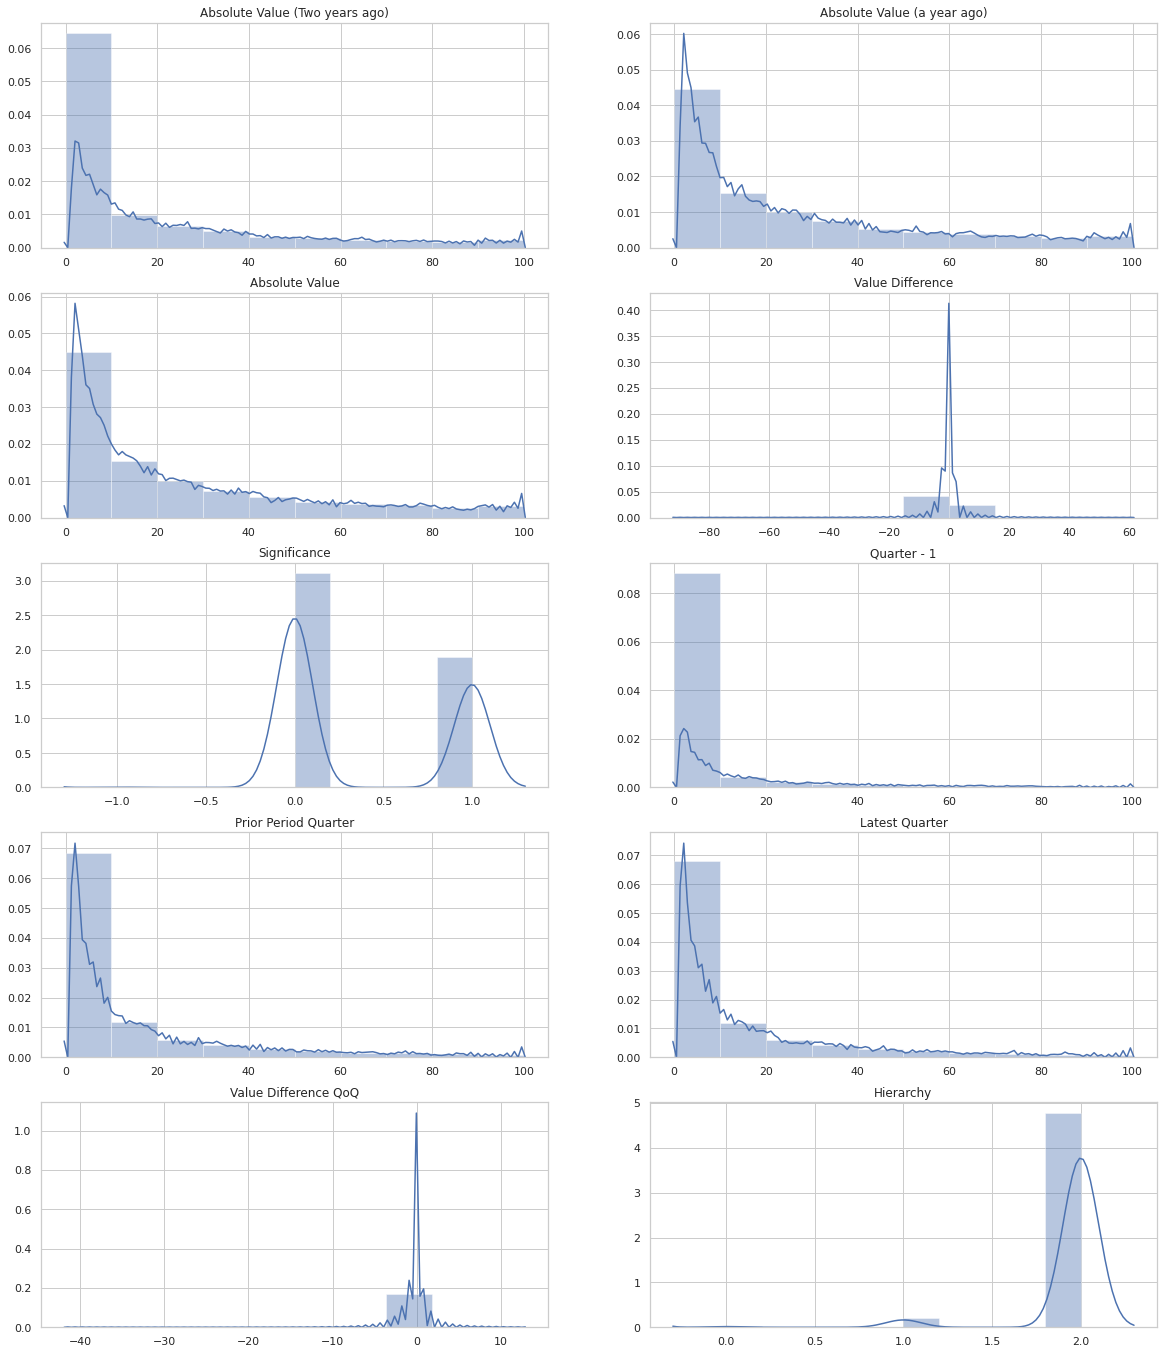

In [181]:
sns.set(style="whitegrid")

cols = pen_num.columns

fig = plt.figure(figsize=(20,24))

for i in range(pen_num.shape[1]):
    ax = fig.add_subplot(5, 2, i+1)
    ax = sns.distplot(pen_num.iloc[:,i:i+1], bins=10, kde_kws={'bw':0.1})
    ax.set(title=cols[i])
    
plt.show()

#### Observations:

We will perform a sanity check for the data types and filter out unwanted observations or noise.

Penetration is expressed in a percentage and appears on a scale of 0 to 100 on our dataset. Significance in this case is either 0 or 1 based on the increase or decrease in period over period penetration rates.

Clearly, in 6Ps Data, the penetration rates >100 seems incorrect and should be removed.

In [10]:
# Descriptive statistics
penetration.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,184066.00,2017.80,0.40,2017.00,2018.00,2018.00,2018.00,2018.00
Measure Category,99580.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Absolute Value (Two years ago),184066.00,15.26,23.99,0.00,0.00,2.70,21.12,100.00
Absolute Value (a year ago),184066.00,23.99,26.36,0.00,3.50,13.01,36.70,100.00
Absolute Value,184066.00,23.62,26.14,0.00,3.40,12.80,36.30,100.00
Value Difference,184066.00,-0.37,2.26,-91.80,-1.20,-0.20,0.40,61.20
Significance,184066.00,0.38,0.49,-1.00,0.00,0.00,1.00,1.00
Quarter - 1,99580.00,4.61,13.47,0.00,0.00,0.00,1.00,100.00
Prior Period Quarter,99580.00,12.30,19.57,0.00,0.50,3.30,14.90,100.00
Latest Quarter,99580.00,12.34,19.49,0.00,0.50,3.50,15.00,100.00


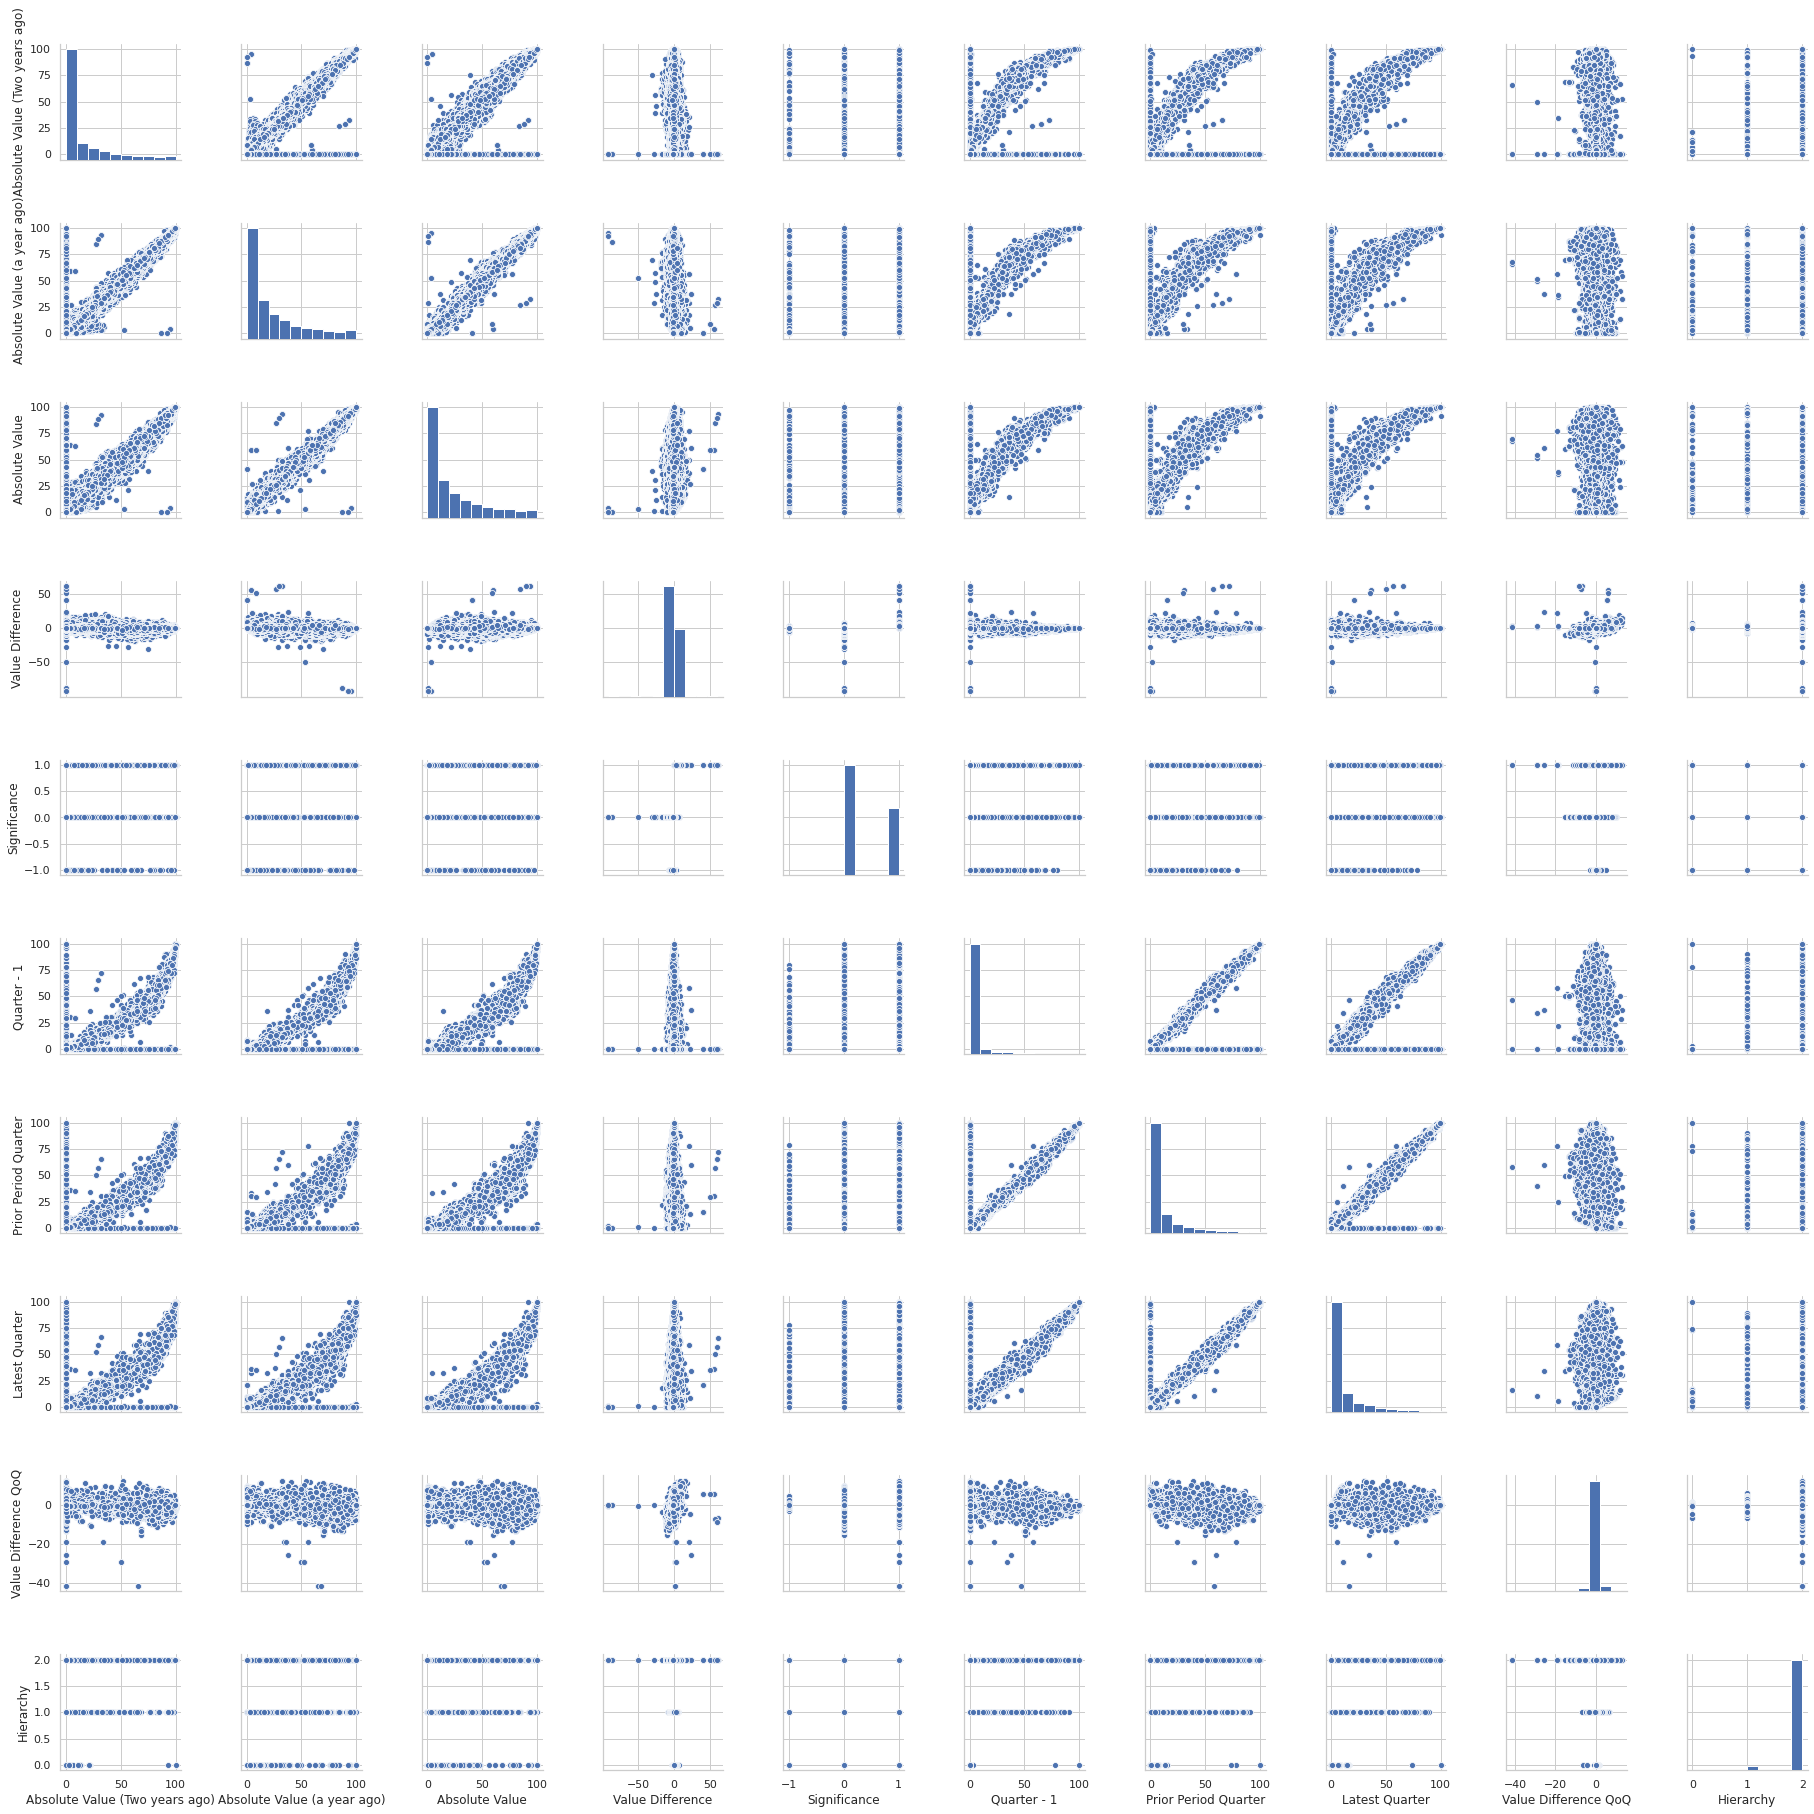

In [9]:
sns.pairplot(pen_num)

## 3. Finance dataset

In [129]:
# all possible way for missing values
missing_values = ["n/a", "na", "--", "-","", "#N/A"]

In [11]:
fin_df = pd.read_excel('../input/Finance.xlsx', na_values = missing_values)
neilsen_NL = pd.read_excel('../input/Nielsen Market Netherlands 2019 MAT Report_modified.xlsx', na_values = missing_values)
neilsen_UK = pd.read_excel('../input/Nielsen Market UK Deodorants_modified.xlsx', na_values = missing_values)

In [12]:
fin_df.head()

,Company code,Org Descripton,Sales Organization,Org Code,Big C,Small C,Category,Brand,Key Customer,Geography,...,PBO,Deflated Turnover Hyper adjustment,SC Controlled Costs,Underlying Operating Profit,Underlying Operating Profit by PCat,Material Costs,Production Costs,Distribution Costs,SC Overheads & Allocated SCC,Supply Chain Total Business Waste
0,13369,Unilever Indus Limited,ACF001,UIFL - Retail,FOOD & REFRESHMENT,ICE CREAM,ICE CREAM,Solero,OTHERS,Geo 1,...,3107.93,0.00,-2084.60,1887.32,1887.72,-3990.19,-1063.31,-735.55,-237.31,-48.43
1,13369,Unilever Indus Limited,ACF001,UIFL - Retail,FOOD & REFRESHMENT,ICE CREAM,ICE CREAM,Ben & Jerry's,ICE Cream,Geo 1,...,1743.86,0.00,-1295.05,1049.57,1061.83,-2270.21,-674.54,-446.38,-139.71,-34.42
2,13369,Unilever Indus Limited,ACF001,UIFL - Retail,FOOD & REFRESHMENT,ICE CREAM,ICE CREAM,Ola,MAF HYPERMARKET ABCDD PVT LIMITE,Geo 1,...,0.12,0.00,0.10,-0.14,0.12,0.09,-0.01,0.10,0.01,-0.00
3,13369,Unilever Indus Limited,ACF001,UIFL - Retail,FOOD & REFRESHMENT,ICE CREAM,ICE CREAM,Swirl's,METRO HABIB CASH & CARRY ABCDD,Geo 1,...,0.11,0.00,0.07,-0.13,0.11,0.05,0.00,0.07,0.00,0.00
4,13369,Unilever Indus Limited,ACF001,UIFL - Retail,FOOD & REFRESHMENT,ICE CREAM,ICE CREAM,Eskimo,IMTIAZ PROVISION STORE,Geo 1,...,0.04,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00


In [13]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 32 columns):
Company code                           936 non-null int64
Org Descripton                         936 non-null object
Sales Organization                     932 non-null object
Org Code                               936 non-null object
Big C                                  430 non-null object
Small C                                430 non-null object
Category                               936 non-null object
Brand                                  930 non-null object
Key Customer                           780 non-null object
Geography                              936 non-null object
Fiscal year/period                     936 non-null object

Gross Sales Value (GSV)               936 non-null int64

NIV                                   936 non-null object
Turnover                               584 non-null object
Acquisition Turnover                   582 non-null float64
Turnover PY

In [128]:
fin_df.isna().sum()

Company code                             0
Org Descripton                           0
Sales Organization                       4
Org Code                                 0
Big C                                  506
Small C                                506
Category                                 0
Brand                                    6
Key Customer                           156
Geography                                0
Fiscal year/period                       0
\nGross Sales Value (GSV)                0
\nNIV                                    0
Turnover                               352
Acquisition Turnover                   354
Turnover PY                            352
Disposal Turnover                      354
Deflated CY Turnover                   354
Deflated Acquisition Turnover          354
Total Supply Chain Cost                354
Gross Profit                             6
Brand and Marketing Investment           6
PBO                                      6
Deflated Tu

In [144]:
# Descriptive statistics
fin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company code,936.00,69336.89,74484.05,13369.00,13369.00,13369.00,168357.00,168357.00
\nGross Sales Value (GSV),936.00,4704208487433.32,2845215270896.46,48643304977.00,2320617153044.75,4656889964332.00,6975140963586.50,9981802821458.00
\nNIV,936.00,5049964187267.31,2864340415019.21,0.00,2378136044334.75,5201814495909.50,7564070052739.00,9946689821836.00
Acquisition Turnover,582.00,-1.28,6.29,-42.04,0.00,0.00,0.00,0.00
Turnover PY,584.00,333.91,1125.29,-0.04,0.21,18.97,170.89,10262.73
Disposal Turnover,582.00,-0.22,1.13,-7.77,0.00,0.00,0.00,0.00
Deflated CY Turnover,582.00,330.07,1133.65,-0.03,0.20,23.49,166.05,10394.95
Deflated Acquisition Turnover,582.00,-1.28,6.29,-42.04,0.00,0.00,0.00,0.00
Total Supply Chain Cost,582.00,-193.22,667.70,-6074.79,-90.59,-12.08,-0.03,0.86
Gross Profit,930.00,85.01,375.53,-10.78,0.00,0.02,18.48,4297.65


In [152]:
fin_df_num = fin_df.iloc[:,11:32]
fin_df_num

,\nGross Sales Value (GSV),\nNIV,Turnover,Acquisition Turnover,Turnover PY,Disposal Turnover,Deflated CY Turnover,Deflated Acquisition Turnover,Total Supply Chain Cost,Gross Profit,...,PBO,Deflated Turnover Hyper adjustment,SC Controlled Costs,Underlying Operating Profit,Underlying Operating Profit by PCat,Material Costs,Production Costs,Distribution Costs,SC Overheads & Allocated SCC,Supply Chain Total Business Waste
0,1789140681013,5348862682752,10372.44,-42.04,10262.73,-7.77,10394.95,-42.04,-6074.79,4297.65,...,3107.93,0.00,-2084.60,1887.32,1887.72,-3990.19,-1063.31,-735.55,-237.31,-48.43
1,3640713901610,9736146209004,5912.49,-34.88,5809.83,-6.53,5883.99,-34.88,-3565.26,2347.23,...,1743.86,0.00,-1295.05,1049.57,1061.83,-2270.21,-674.54,-446.38,-139.71,-34.42
2,245517968347,3646279689870,-0.03,0.00,0.00,0.00,0.07,0.00,0.19,0.16,...,0.12,0.00,0.10,-0.14,0.12,0.09,-0.01,0.10,0.01,-0.00
3,8465290278781,5729643781297,0,0.00,0.00,0.00,0.00,0.00,0.11,0.11,...,0.11,0.00,0.07,-0.13,0.11,0.05,0.00,0.07,0.00,0.00
4,9656007049103,2042987194056,0,0.00,0.00,0.00,0.00,0.00,0.04,0.04,...,0.04,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,6567061330952,856845377398,1.21,0.00,0.85,0.00,1.19,0.00,-0.61,0.60,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00
932,1287969371722,4999980753456,2.27,0.00,2.60,0.00,2.29,0.00,-1.12,1.16,...,1.02,0.00,0.00,1.02,1.02,0.00,0.00,0.00,0.00,0.00
933,7127060682958,9762387200443,0.28,0.00,0.52,0.00,0.28,0.00,0.30,0.58,...,0.59,0.00,0.00,0.59,0.59,0.00,0.00,0.00,0.00,0.00
934,3823405450635,2945542355272,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [153]:
# Replacing strings in numerical columns

num_cols = fin_df_num.columns

for col in num_cols: 
    cnt=0
    for row in fin_df_num[col]:
        a = str(fin_df_num.loc[cnt,col])
        if not a.isdecimal():
            fin_df_num[col] = fin_df_num[col].replace(to_replace=a,value=np.nan)
        cnt+=1
fin_df_num = fin_df_num.fillna(0)

In [162]:
fin_df_num

,\nGross Sales Value (GSV),\nNIV,Turnover,Acquisition Turnover,Turnover PY,Disposal Turnover,Deflated CY Turnover,Deflated Acquisition Turnover,Total Supply Chain Cost,Gross Profit,...,PBO,Deflated Turnover Hyper adjustment,SC Controlled Costs,Underlying Operating Profit,Underlying Operating Profit by PCat,Material Costs,Production Costs,Distribution Costs,SC Overheads & Allocated SCC,Supply Chain Total Business Waste
0,1789140681013,5348862682752,10372.44,-42.04,10262.73,-7.77,10394.95,-42.04,-6074.79,4297.65,...,3107.93,0.00,-2084.60,1887.32,1887.72,-3990.19,-1063.31,-735.55,-237.31,-48.43
1,3640713901610,9736146209004,5912.49,-34.88,5809.83,-6.53,5883.99,-34.88,-3565.26,2347.23,...,1743.86,0.00,-1295.05,1049.57,1061.83,-2270.21,-674.54,-446.38,-139.71,-34.42
2,245517968347,3646279689870,-0.03,0.00,0.00,0.00,0.07,0.00,0.19,0.16,...,0.12,0.00,0.10,-0.14,0.12,0.09,-0.01,0.10,0.01,-0.00
3,8465290278781,5729643781297,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.11,...,0.11,0.00,0.07,-0.13,0.11,0.05,0.00,0.07,0.00,0.00
4,9656007049103,2042987194056,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,...,0.04,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,6567061330952,856845377398,1.21,0.00,0.85,0.00,1.19,0.00,-0.61,0.60,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00
932,1287969371722,4999980753456,2.27,0.00,2.60,0.00,2.29,0.00,-1.12,1.16,...,1.02,0.00,0.00,1.02,1.02,0.00,0.00,0.00,0.00,0.00
933,7127060682958,9762387200443,0.28,0.00,0.52,0.00,0.28,0.00,0.30,0.58,...,0.59,0.00,0.00,0.59,0.59,0.00,0.00,0.00,0.00,0.00
934,3823405450635,2945542355272,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


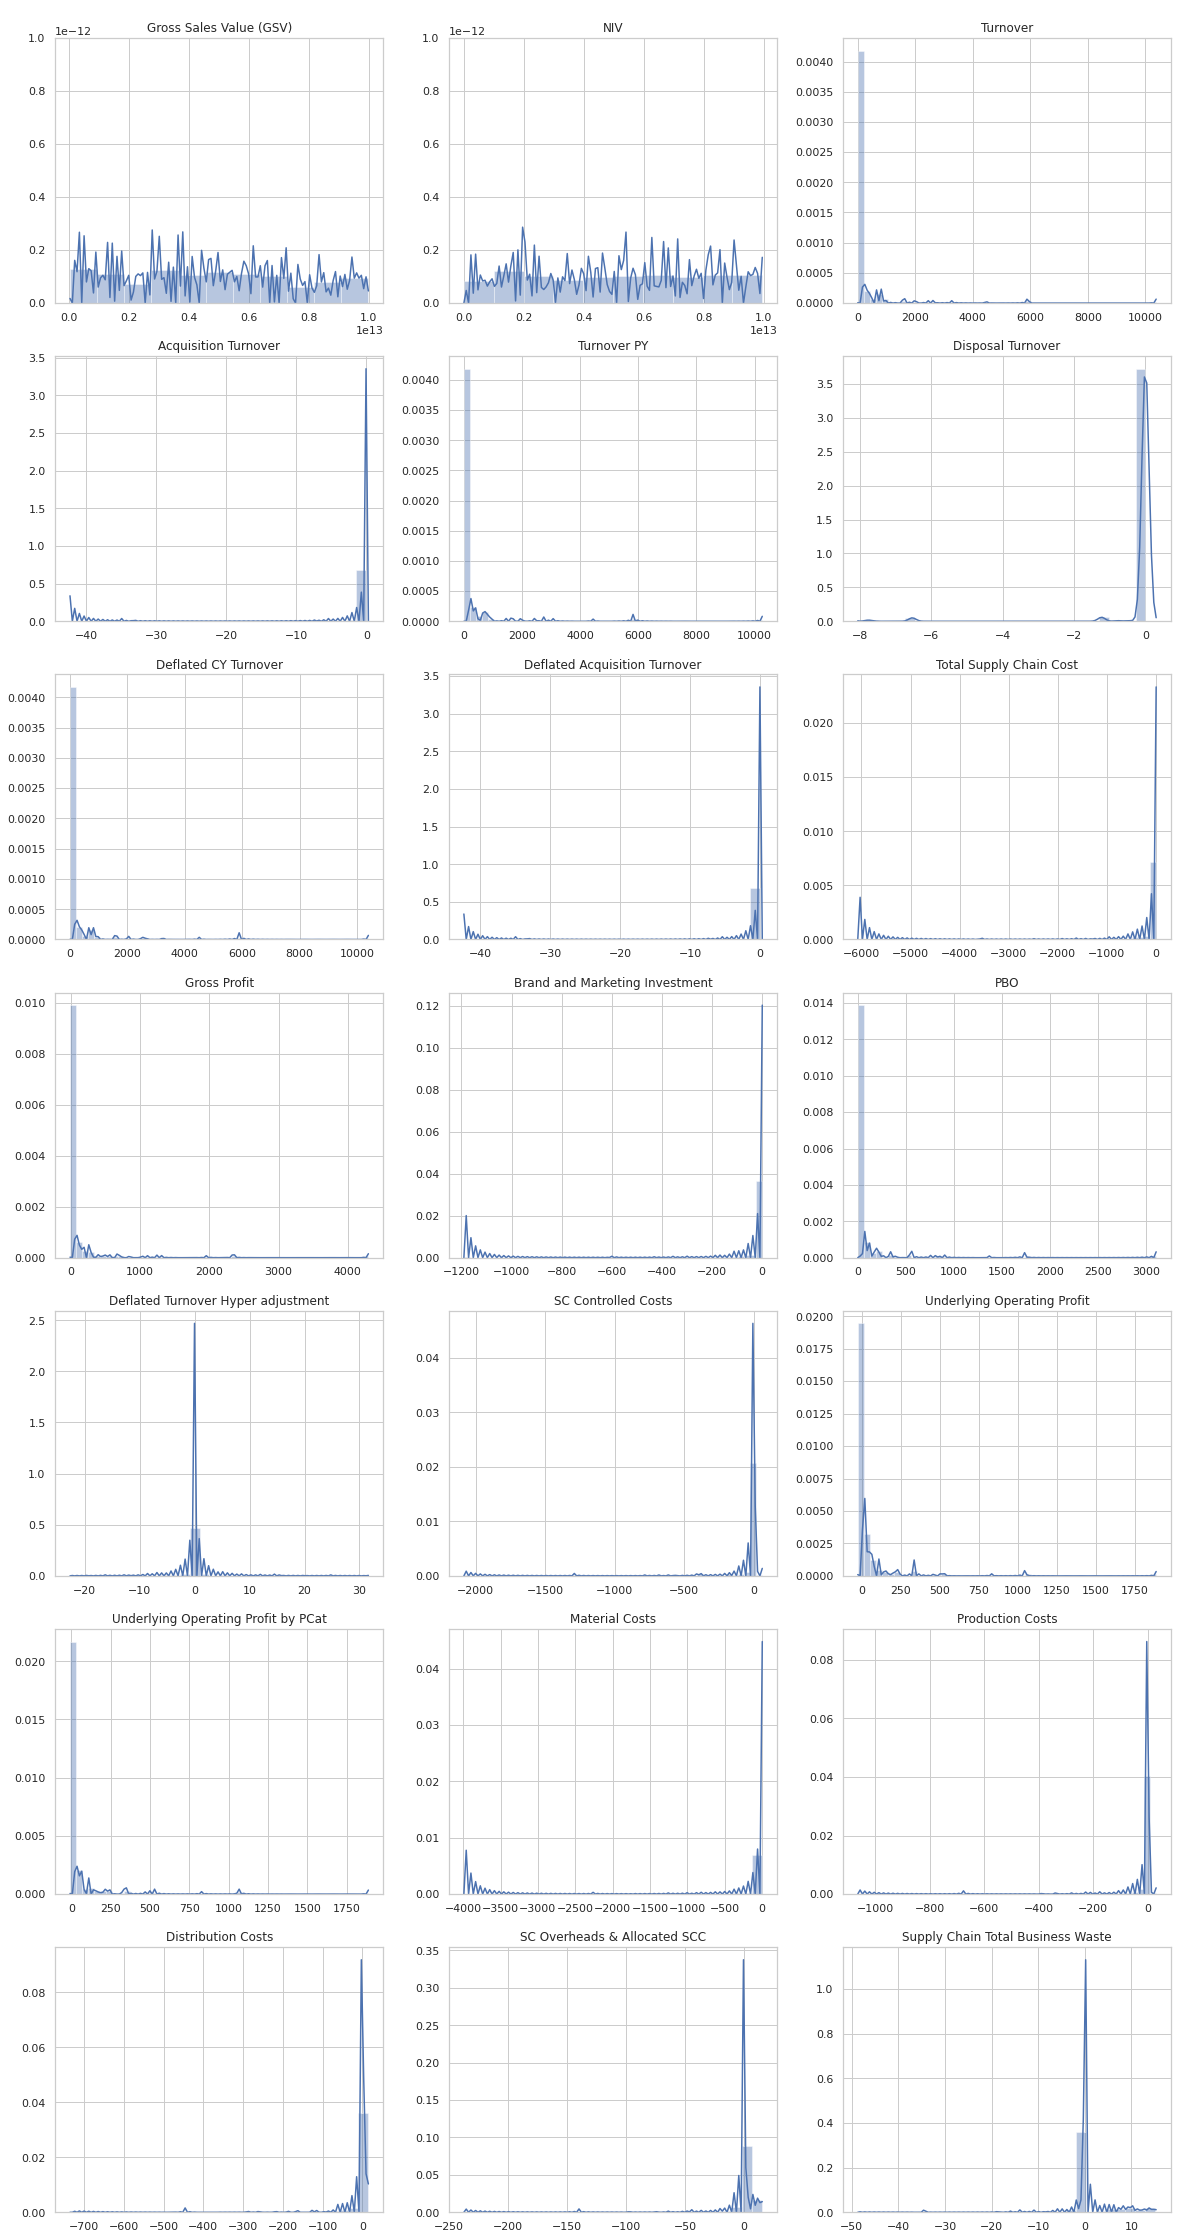

In [178]:
cols = fin_df_num.columns

fig = plt.figure(figsize=(20,40))

for i in range(fin_df_num.shape[1]):
    ax = fig.add_subplot(7, 3, i+1)
    ax = sns.distplot(fin_df_num.iloc[:,i:i+1], kde_kws={'bw':0.1})
    ax.set(title=cols[i])
    
plt.show()

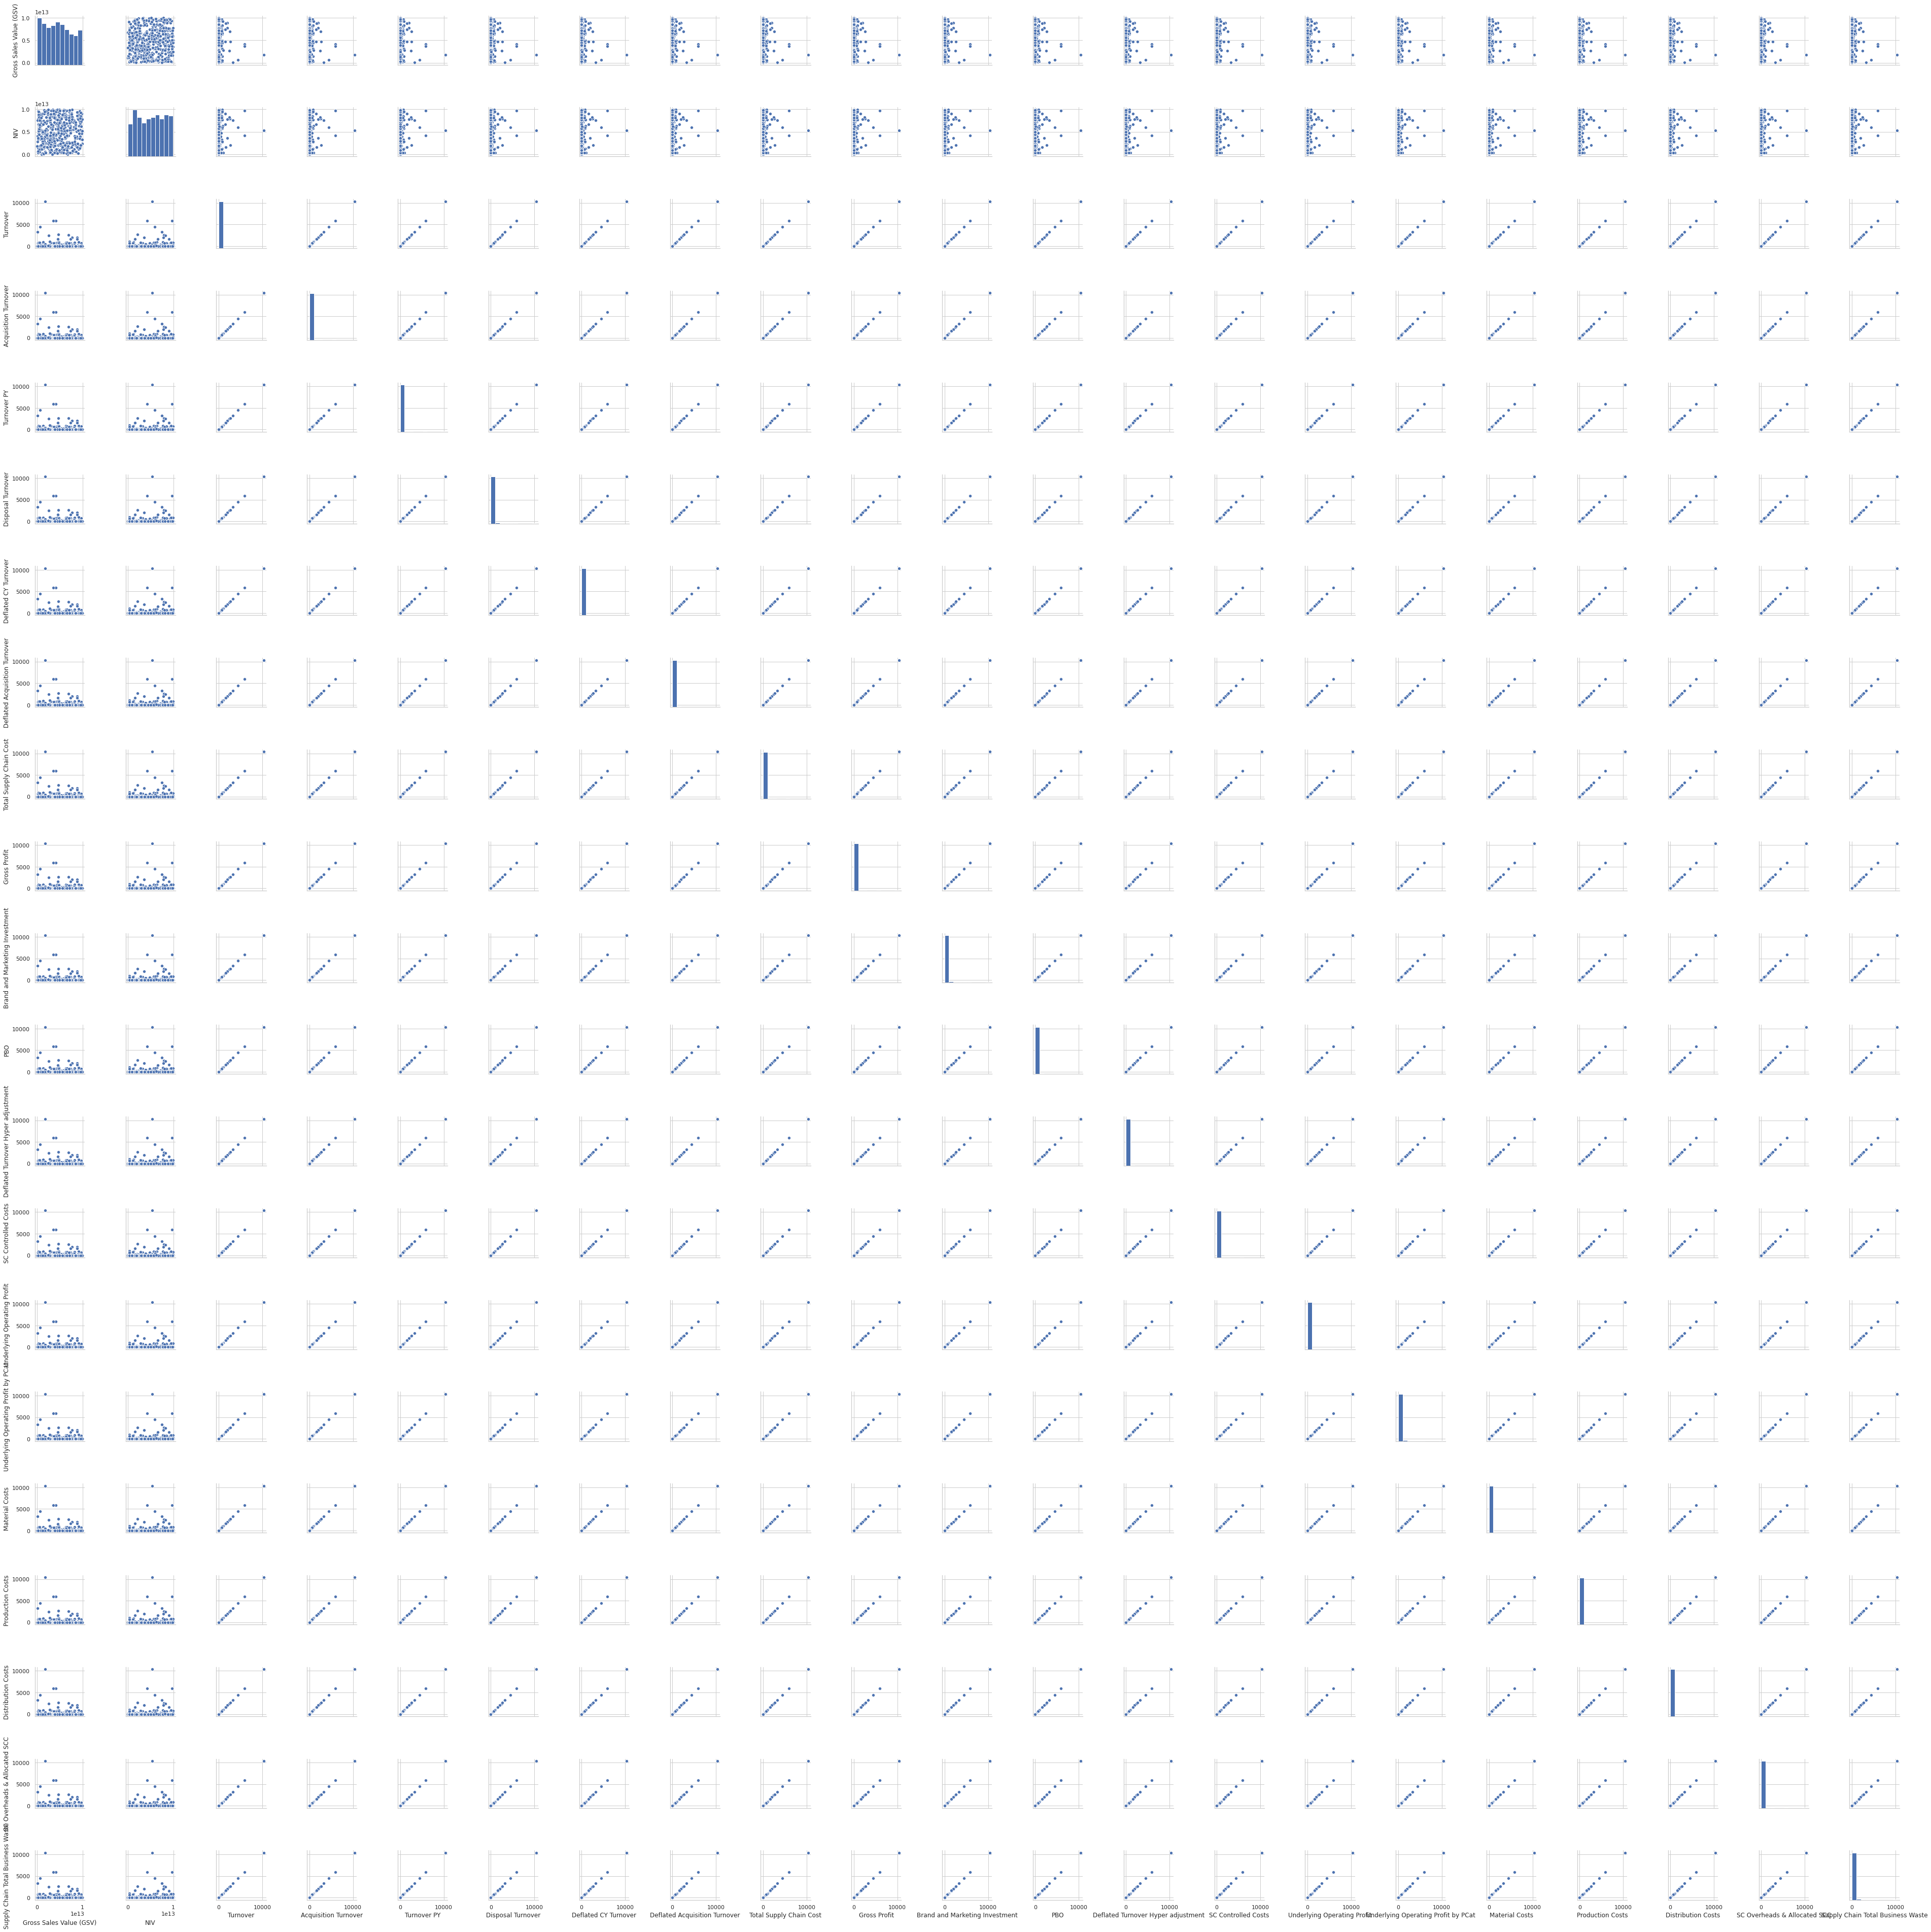

In [127]:
sns.pairplot(fin_df_num)

In [ ]:
# Sales by brand bar chart



In [131]:
neilsen_NL.head()

,Periods,Market Desc,CATEGORY,MARKET,COMPANY,GLOBAL BRAND,BRAND,SEGMENT,Base Value,Promo Base Value,Value Sales,Base Price per Unit,Price pr Unit,Base Price per L/KG,Price pr L/KG
0,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,BEVERAGES,READY TO DRINK TEA,UNILEVER,LIPTON INTERNATIONAL,LIPTON,STILL,2522340.78,131480.78,2524970.00,2.17,2.16,1.17,1.17
1,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,BEVERAGES,READY TO DRINK TEA,UNILEVER,LIPTON INTERNATIONAL,LIPTON,CARBONATED,1711525.73,18725.73,1819580.00,2.24,2.16,1.25,1.24
2,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,DRESSINGS,KETCHUP,UNILEVER,CALVE,CALVE,NOT AVAILABLE,98633.20,-15626.80,115190.00,0.99,0.99,2.29,2.30
3,NaN,NETHERLANDS DISCOUNTER,DRESSINGS,SALAD DRESSINGS,UNILEVER,CALVE,CALVE,NOT AVAILABLE,45398.78,-51.22,45550.00,0.98,0.99,2.33,nan
4,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,DRESSINGS,MAYONNAISE,UNILEVER,CALVE,CALVE,NOT AVAILABLE,1340966.51,-43803.49,1387870.00,2.25,2.20,3.05,3.05


In [133]:
neilsen_NL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29639 entries, 0 to 29638
Data columns (total 15 columns):
Periods                29637 non-null object
Market Desc            29614 non-null object
CATEGORY               29618 non-null object
MARKET                 29622 non-null object
COMPANY                29619 non-null object
GLOBAL BRAND           29613 non-null object
BRAND                  29630 non-null object
SEGMENT                29623 non-null object
Base Value             29465 non-null float64
Promo Base Value       29460 non-null float64
Value Sales            29480 non-null float64
Base Price per Unit    29377 non-null float64
Price pr Unit          28047 non-null float64
Base Price per L/KG    29310 non-null float64
Price pr L/KG          18177 non-null float64
dtypes: float64(7), object(8)
memory usage: 3.4+ MB


In [135]:
# Descriptive statistics
neilsen_NL.describe()

,Base Value,Promo Base Value,Value Sales,Base Price per Unit,Price pr Unit,Base Price per L/KG,Price pr L/KG
count,29465.00,29460.00,29480.00,29377.00,28047.00,29310.00,18177.00
mean,1371826.71,283148.93,2090657.24,3.07,2.76,38.12,36.35
std,5289201.20,1140309.12,7752270.29,3.09,2.98,955.98,479.98
min,0.00,-450159.27,0.00,0.00,0.00,0.00,0.00
25%,10839.17,-4.17,12720.00,1.69,1.50,2.99,2.95
50%,94622.21,4751.17,124860.00,2.74,2.45,4.30,4.76
75%,612812.63,76631.53,844635.00,3.64,3.31,7.89,9.51
max,80178292.65,18356616.78,114485740.00,54.51,91.67,156168.00,17610.00


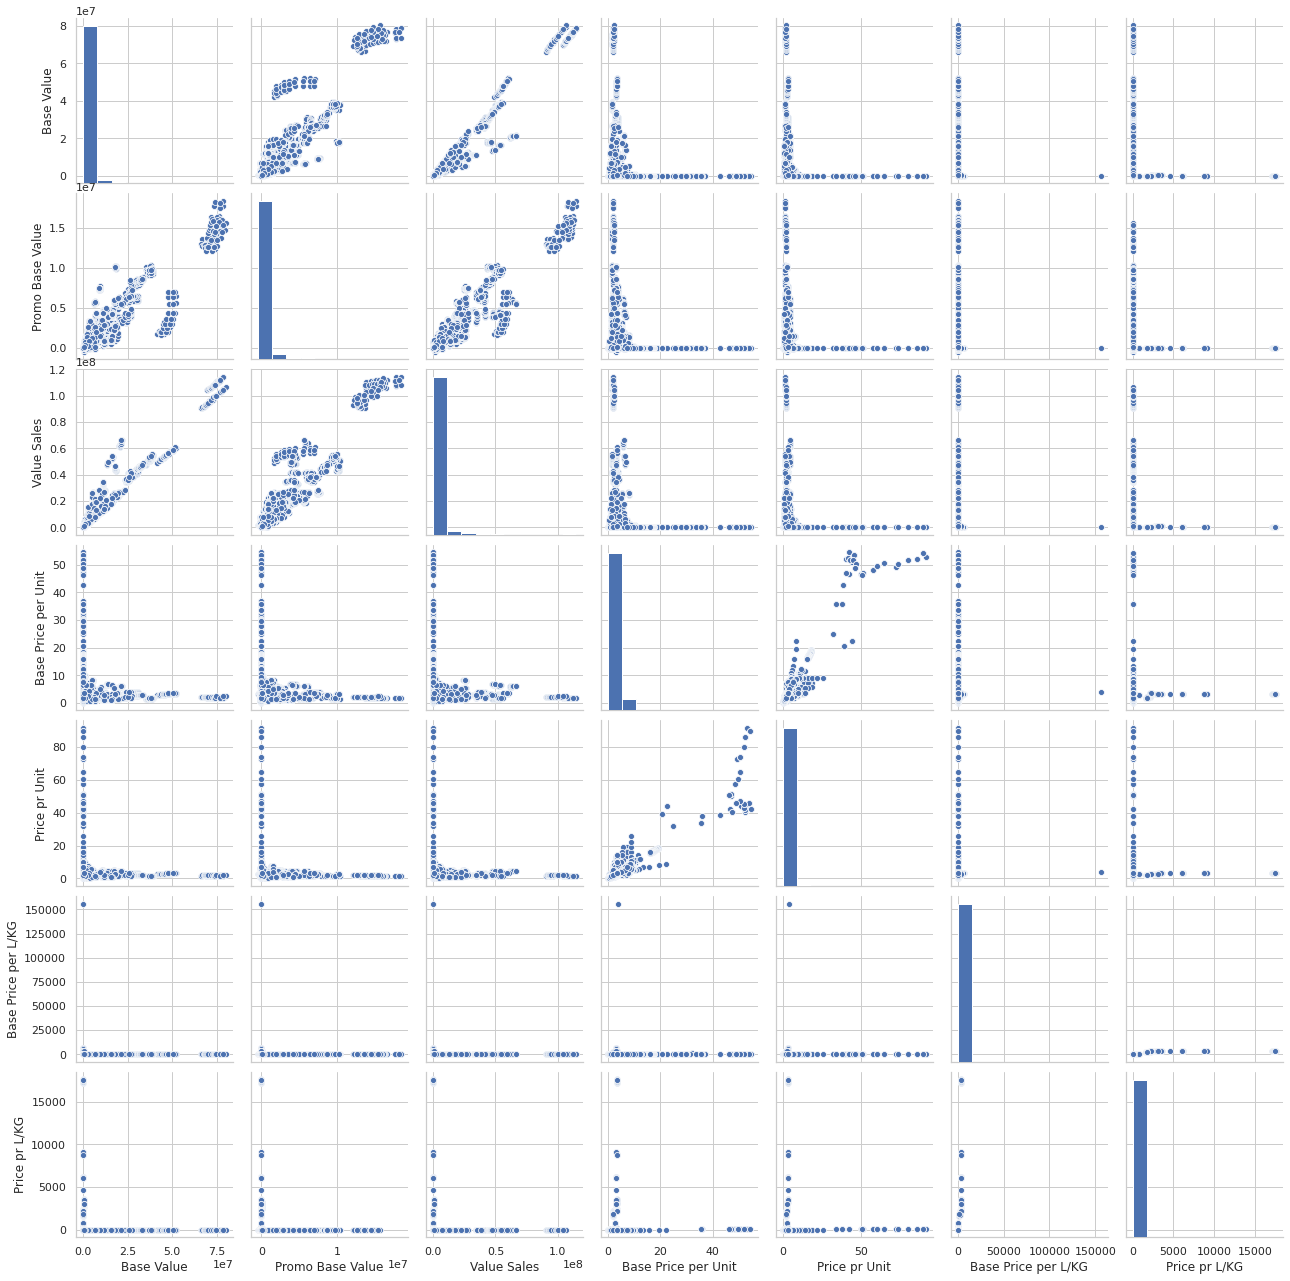

In [137]:
# Extracting numerical columns

neilsen_NL_num = neilsen_NL.iloc[:,-7:]
sns.pairplot(neilsen_NL_num)

In [184]:
fin_df.iloc[97:105,:]

,Company code,Org Descripton,Sales Organization,Org Code,Big C,Small C,Category,Brand,Key Customer,Geography,...,PBO,Deflated Turnover Hyper adjustment,SC Controlled Costs,Underlying Operating Profit,Underlying Operating Profit by PCat,Material Costs,Production Costs,Distribution Costs,SC Overheads & Allocated SCC,Supply Chain Total Business Waste
97,13369,Unilever Indus Limited,ACF001,UIFL - Retail,HOME CARE,LIFE ESSENTIALS,LIFE ESSENTIALS,Pure IT,NaN,Geo 1,...,3.49,0.00,0.00,3.49,3.49,0.00,0.00,0.00,0.00,0.00
98,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,ICE CREAM,Solero,OTHERS,Geo 1,...,1.33,0.00,0.00,1.33,1.33,0.00,0.00,0.00,0.00,0.00
99,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,ICE CREAM,Ben & Jerry's,ICE Cream,Geo 1,...,32.15,0.00,-20.43,20.95,17.98,-53.29,-9.59,-7.02,-3.03,-0.79
100,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,ICE CREAM,Ola,MAF HYPERMARKET ABCDD PVT LIMITE,Geo 1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00
101,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,ICE CREAM,Swirl's,METRO HABIB CASH & CARRY ABCDD,Geo 1,...,1.02,0.00,0.00,1.02,1.02,0.00,0.00,0.00,0.00,0.00
102,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,ICE CREAM,Eskimo,IMTIAZ PROVISION STORE,Geo 1,...,0.59,0.00,0.00,0.59,0.59,0.00,0.00,0.00,0.00,0.00
103,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,ICE CREAM,Misa,NaN,Geo 1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
104,13369,Unilever Indus Limited,ACF001,UIFL - Retail,NaN,NaN,TEA,Red Label,OTHERS,Geo 1,...,3.96,0.00,0.00,3.96,3.96,0.00,0.00,0.00,0.00,0.00


In [132]:
neilsen_UK.head()

,PERIOD,CATEGORY GROUP,CATEGORY,MARKET,COMPANY,GLOBAL BRAND,BRAND,FORMAT,TYPE,TARGET USER,SUBBRAND,VARIANT,ITEM,GB BRAND,ACTUAL PACK SIZE,Value Sales ('000),Volume Sales ('000),Unit Sales ('000),Inc Value
0,P4 2017,PERSONAL CARE,DEODORANTS & FRAGRANCES,DEODORANTS,RECKITT BENCKISER,SCHOLL,SCHOLL,OTHER,NON ANTI-PERSPIRANT (NON-AP),FEMALE/UNISEX,FRESH STEP,ORIGINAL,RECKITT SCHOLL ORGNL 150 M STAN~P0000000000006...,SCHOLL,150 ML,21.26,0.74,4.98,nan
1,P4 2017,PERSONAL CARE,DEODORANTS & FRAGRANCES,DEODORANTS,NaN,SCHOLL,SCHOLL,OTHER,NON ANTI-PERSPIRANT (NON-AP),FEMALE/UNISEX,FRESH STEP,ORIGINAL,RECKITT SCHOLL ORGNL 150 M STAN~P0000000000006...,SCHOLL,150 ML,79.39,18.69,18.69,nan
2,P4 2017,PERSONAL CARE,DEODORANTS & FRAGRANCES,DEODORANTS,NaN,SCHOLL,SCHOLL,OTHER,NON ANTI-PERSPIRANT (NON-AP),FEMALE/UNISEX,FRESH STEP,ORIGINAL,RECKITT SCHOLL ORGNL 150 M STAN~P0000000000006...,SCHOLL,150 ML,122.83,4.27,28.42,nan
3,P4 2017,PERSONAL CARE,DEODORANTS & FRAGRANCES,DEODORANTS,RECKITT BENCKISER,SCHOLL,SCHOLL,OTHER,NON ANTI-PERSPIRANT (NON-AP),FEMALE/UNISEX,ODOUR CONTROL,ORIGINAL,RECKITT SCHOLL ORGNL 150 M STAN~P0000000000006...,SCHOLL,150 ML,0.00,0.00,0.00,nan
4,P4 2017,PERSONAL CARE,DEODORANTS & FRAGRANCES,DEODORANTS,RECKITT BENCKISER,SCHOLL,SCHOLL,OTHER,NON ANTI-PERSPIRANT (NON-AP),FEMALE/UNISEX,ODOUR CONTROL,ORIGINAL,RECKITT SCHOLL ORGNL 150 M STAN~P0000000000006...,SCHOLL,150 ML,1.57,0.14,0.92,nan


In [ ]:
# imputing missing values (only for the categorical variable)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
neilsen_UK.iloc[:,0:14] = imputer.fit_transform(neilsen_UK.iloc[:,0:14])